# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_data = []
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    

    print(f"City {counter}: {city}")
    print("---------------------")
    
    query_url = f"{url}appid={api_key}&q={city}"
    response = requests.get(query_url).json()
    counter = counter + 1
    
    try:
        temp_max = (response['main']['temp_max'])
        lat = (response['coord']['lat'])
        lon = (response['coord']['lon'])
        clouds = (response['clouds']['all'])
        date = (response['dt'])
        humidity = (response['main']['humidity'])
        wind = (response['wind']['speed'])
        name = (response['name'])
        
        #save data in a dictionary
        weather_data = {"Max Temp" : temp_max,
                        "Lat" : lat,
                        "Lon" : lon,
                        "Cloudiness" : clouds,
                        "Date" : date,
                        "Humidity" : humidity,
                        "Wind Speed" : wind,
                        "City" : name}
    
        city_data.append(weather_data)
        
    except KeyError:
        print("Skipping: City Not Found")

response

City 1: saint george
---------------------
City 2: vao
---------------------
City 3: mataura
---------------------
City 4: broken hill
---------------------
City 5: kaitangata
---------------------
City 6: punta arenas
---------------------
City 7: kavieng
---------------------
City 8: yellowknife
---------------------
City 9: rio grande
---------------------
City 10: antofagasta
---------------------
City 11: albany
---------------------
City 12: eureka
---------------------
City 13: busselton
---------------------
City 14: airai
---------------------
City 15: hobart
---------------------
City 16: nong khae
---------------------
City 17: amderma
---------------------
Skipping: City Not Found
City 18: tomobe
---------------------
City 19: khatanga
---------------------
City 20: sungaipenuh
---------------------
City 21: barrow
---------------------
City 22: taolanaro
---------------------
Skipping: City Not Found
City 23: pisco
---------------------
City 24: san jose
------------------

City 187: jalu
---------------------
City 188: namibe
---------------------
City 189: parainen
---------------------
Skipping: City Not Found
City 190: rocha
---------------------
City 191: rawson
---------------------
City 192: dingle
---------------------
City 193: leningradskiy
---------------------
City 194: viligili
---------------------
Skipping: City Not Found
City 195: yar-sale
---------------------
City 196: katangli
---------------------
City 197: zaozerne
---------------------
City 198: orzhytsya
---------------------
City 199: sorong
---------------------
City 200: iqaluit
---------------------
City 201: manhattan
---------------------
City 202: zhezkazgan
---------------------
City 203: naze
---------------------
City 204: laiagam
---------------------
Skipping: City Not Found
City 205: fairbanks
---------------------
City 206: lompoc
---------------------
City 207: viedma
---------------------
City 208: lebanon
---------------------
City 209: bilma
---------------------
C

Skipping: City Not Found
City 373: voorhout
---------------------
City 374: basco
---------------------
City 375: saint pete beach
---------------------
City 376: ndele
---------------------
Skipping: City Not Found
City 377: aykhal
---------------------
City 378: malko tarnovo
---------------------
City 379: bolshaya rechka
---------------------
City 380: lakatoro
---------------------
City 381: eyl
---------------------
City 382: nhamunda
---------------------
City 383: ancud
---------------------
City 384: arteaga
---------------------
City 385: ostrovnoy
---------------------
City 386: berlevag
---------------------
City 387: sergeyevka
---------------------
City 388: ostersund
---------------------
City 389: la ronge
---------------------
City 390: alice springs
---------------------
City 391: kabompo
---------------------
City 392: parrita
---------------------
City 393: karratha
---------------------
City 394: amarpur
---------------------
City 395: ust-nera
--------------------

City 563: chesma
---------------------
City 564: praia da vitoria
---------------------
City 565: asau
---------------------
Skipping: City Not Found
City 566: provost
---------------------
City 567: kutum
---------------------
City 568: horsham
---------------------
City 569: sao filipe
---------------------
City 570: caronport
---------------------
City 571: komsomolskiy
---------------------
City 572: nguiu
---------------------
Skipping: City Not Found
City 573: tubuala
---------------------
City 574: hereford
---------------------
City 575: talcahuano
---------------------
City 576: emerald
---------------------
City 577: wenshang
---------------------
City 578: kidodi
---------------------
City 579: sobolevo
---------------------
City 580: ormara
---------------------
City 581: ulladulla
---------------------
City 582: tomatlan
---------------------
City 583: hualmay
---------------------
City 584: christchurch
---------------------
City 585: venice
---------------------
City 586

{'coord': {'lon': 150.67, 'lat': -10.62},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 298.9,
  'pressure': 1011.79,
  'humidity': 89,
  'temp_min': 298.9,
  'temp_max': 298.9,
  'sea_level': 1011.79,
  'grnd_level': 997.18},
 'wind': {'speed': 3.2, 'deg': 177.137},
 'rain': {'3h': 5.312},
 'clouds': {'all': 50},
 'dt': 1565496220,
 'sys': {'message': 0.0087,
  'country': 'PG',
  'sunrise': 1565467866,
  'sunset': 1565510059},
 'timezone': 36000,
 'id': 2132606,
 'name': 'Samarai',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
new_df = pd.DataFrame(city_data)
new_df = new_df.rename(columns={"Max Temp": "Max_Temp"})
new_df = new_df.rename(columns={"Wind Speed": "Wind_Speed"})
new_df.head()

,City,Cloudiness,Date,Humidity,Lat,Lon,Max_Temp,Wind_Speed
0,Saint George,0,1565496109,60,39.45,22.34,299.82,2.10
1,Vao,20,1565496110,87,59.10,26.19,286.53,3.07
2,Mataura,100,1565496110,75,-46.19,168.86,282.59,4.47
3,Broken Hill,75,1565496110,71,-31.97,141.45,284.15,11.80
4,Kaitangata,100,1565496110,79,-46.28,169.85,280.93,6.71


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [5]:

new_df.to_csv('weatherpydata.csv')

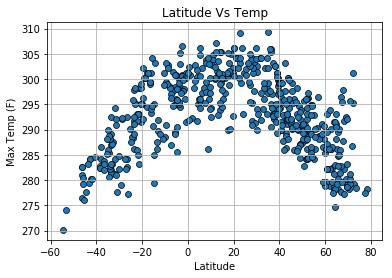

In [6]:

#plot the lat vs temp data
plt.scatter(new_df.Lat,
            new_df.Max_Temp,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Latitude Vs Temp")
plt.grid()

# plt.show()
plt.savefig("latVStemp.png")

#### Latitude vs. Humidity Plot

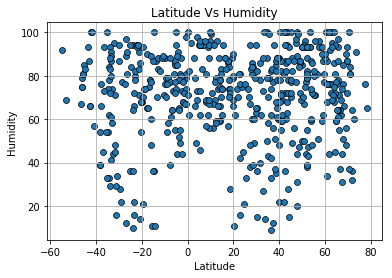

In [7]:

#plot the lat vs humidity data
plt.scatter(new_df.Lat,
            new_df.Humidity,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity")
plt.grid()
# plt.show()

plt.savefig("latVShumidity.png")

#### Latitude vs. Cloudiness Plot

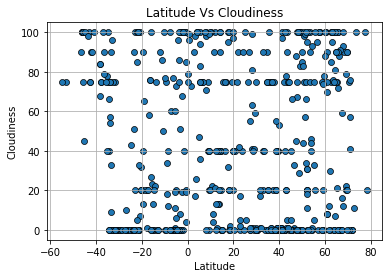

In [8]:
#plot the lat vs cloudiness data
plt.scatter(new_df.Lat,
            new_df.Cloudiness,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness")
plt.grid()
# plt.show()
plt.savefig("latVScloudiness.png")

#### Latitude vs. Wind Speed Plot

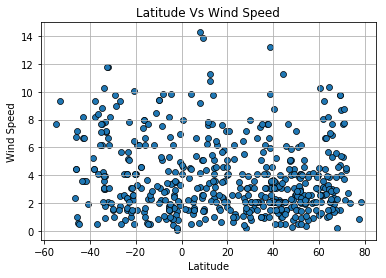

In [9]:
#plot the lat vs speed data
plt.scatter(new_df.Lat,
            new_df.Wind_Speed,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed")
plt.grid()
# plt.show()
plt.savefig("latVSwindspeed.png")